<h1>Does Height Matter for Distance Running?</h1>
<h3> By Samuel Kellum </h3>

___

<h4> Table of contents: </h4>
<ol>
<li> Introduction </li>
<li> Data Extraction, Transform and Load </li>
<li> Exploratory Data Analysis and Data Visualization </li>
<li> Hypothesis Testing </li>
<li> Conclusion and Further Study </li>
</ol>

---

<h2 align="center"> 1. Introduction </h2>
<p>Height is very important in most American sports, such as basketball and most positions in football, where the top athletes are rarely shorter than 6 feet tall at the professional and NCAA Division I level. On the other hand, shorter athletes have an advantage in sports like gymnastics or equestrian.</p>
<p>People have always viewed distance running as a sport where height does not matter. The heights of different world class runnners in the same event varies a lot. For example, Kenenisa Bekele, former world record holder in the 10,000m, stands at 5'3. On the other hand, Chris Solinsky, fromer American record holder in the 10,000m, is 6'1. These two athletes are among some of the best distance runners of all-time, competing the same event, but their heights differ by almost an entire foot!</p>
<p>As a Division I runner, I became interested in exploring heights of athletes on Division I cross-country teams after a couple of my teammates noticed that the people on other teams seemed to be significantly taller than us. Many of other teams were also better than my team. This sequence of observations gave me two questions:</p><br>
    <li>Is there a relationship between the average height of a team's runners and team success?</li>
    <li>How does my team (Tulane) compare to other D1 cross-country in terms of average height?</li>
    <p>In this analysis I will attempt to answer the above questions.</p>
    
___


<h2 align="center"> 2. Data Extraction, Transform and Load </h2>

For this analysis, I will be using Python 3, and a variety of python libraries. The first code cell will be importing the necessary libraries.

In [1]:
## Importing and loading everythng we will need to use.
# Load requests
import requests
# Load BeautiulSoup
from bs4 import BeautifulSoup
# Load Regular Expression Library
import re
# Load Headers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36"}
# Load Google Search
from googlesearch import search

# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("fivethirtyeight")

# Load Pandas
import pandas as pd
# Load JSON
import json

# Load Random Number Generator
import random
# Load Scipy Stats
import scipy.stats as stats

The first thing I need is dataset that contains:
<ol>
<li>Every Division I cross-country team in the NCAA</li>
<li>At least one quantitative variable that represents the quality of each team</li>
</ol>
I found an amazing webiste <a href='https://www.lacctic.com/'>LACCTiC.com</a>, that contains exactly what I am loking for. This website standardizes cross-country race results based on a variety of factors, such as weather and course difficulty. The data on this website is extracted from <a href='https://www.tfrrs.org/'>tfrrs.org</a>, which is a website that compiles all collegiate cross county meet results.

After navigating to the <a href='https://www.lacctic.com/leagues/4'>Division I section</a> of the website, I found two tables, one containing information on each individual Division I runner, and the other on each Division I team.

I initially wanted to perform a GET request (a request to get the data from a website) on the Division I section of the website, and collect the data using the `requests` library. However, I eventually realized that the tables are generated dynamically with JavaScript, I decided it would be better to extract the data at the original source (which I found using developer tools), in the form of a JSON object.

The next code sell shows me using the `requests` library to extract information from the original source, and storing the JSON in the form of a list.

In [2]:
#Collect Team Data
teams = []
url = "https://c03mmwsf5i.execute-api.us-east-2.amazonaws.com/production/api_ranking/teams/?leagueids=4&nonull=true&page="
num_pages = 4
for i in range(num_pages):
    url = "https://c03mmwsf5i.execute-api.us-east-2.amazonaws.com/production/api_ranking/teams/?leagueids=4&nonull=true&page=" + str(i+1)
    teams.append(requests.get(url, headers=headers).json()['results'])

Now, we need to flatten the nested list we created into a new list called `data`. To show what the data looks like, I will display the first three teams in the data list.

In [3]:
#Convert nested teams list into a new list 
data = []
for page in teams:
    for team in page:
        data.append(team)
data[0:3]

[{'id': 796,
  'name': 'Northern Arizona',
  'tfrrs_id': 'AZ_college_m_Northern_Arizona',
  'top_5_ability_average': 812,
  'top_runner': 802,
  'fifth_runner': 825,
  'sex': 'M'},
 {'id': 1340,
  'name': 'BYU',
  'tfrrs_id': 'UT_college_m_BYU',
  'top_5_ability_average': 814,
  'top_runner': 794,
  'fifth_runner': 829,
  'sex': 'M'},
 {'id': 325,
  'name': 'Oklahoma State',
  'tfrrs_id': 'OK_college_m_Oklahoma_State',
  'top_5_ability_average': 815,
  'top_runner': 802,
  'fifth_runner': 821,
  'sex': 'M'}]

Next, since we have a list with each element representing one team. We need to iterate through the data and find each team's roster. We can use the `googlesearch` library to perform google searches on each team and return the top google search result based on the query we use. For example, inputting <i>Northern Arizona men's cross country roster 2021-22</i> as a query will return the first google search result of that query. We can do this for every team in our data.

This code takes a few minutes to run because we are performing over 300 google search queries, and pausing for 1.5 seconds between each query to avoid a <i>HTTP Too Many Requests</i> error from google's server.

In [4]:
for i in range(len(data)):
    query = data[i]["name"] + " men's cross country roster 2021-22"
    for url in search(query, tld="co.in", num=1, stop=1, pause=1.5):
        #Add first google search result to data
        data[i]["team_url"] = url

Unfortunately, google's search algorithm is not perfect. After running the above code cell, some search results return incorrect URLS, which we can easily fix manually, as shown below.

In [5]:
#Manually fix incorrect URLs 

#BYU
data[1]["team_url"] = "https://byucougars.com/roster/m-cross-country"

#Columbia
data[61]["team_url"] = "https://gocolumbialions.com/sports/cross-country/roster"

#Liberty
data[66]["team_url"] = "https://www.liberty.edu/flames/cross-country/roster/?gender=Male"

#Cal St. Fullerton
data[95]["team_url"] = "https://www.fullertontitans.com/sports/c-xc/2021-22/mwroster"

#Georgia
data[103]["team_url"] = "https://georgiadogs.com/sports/cross-country/roster"

#California (Berkeley)
data[112]["team_url"] = "https://calbears.com/sports/cross-country/roster"

#Marshall
data[251]["team_url"] = "https://herdzone.com/sports/cross-country/roster"

#Chattanooga
data[261]["team_url"] = "https://gomocs.com/sports/cross-country/roster/"

#Northwestern State (Louisiana)
data[298]["team_url"] = "https://nsudemons.com/sports/cross-country/roster"

#Southern (Baton Rouge)
data[300]["team_url"] = "https://gojagsports.com/sports/cxc/roster"

Now, we can look through each roster and extract the heights and convert those heights to inches. To do so, we should create a couple of functions.

The first function converts a height in feet and inches into inches. For example, it would convert <i>5'6</i> to <i>66</i>, since 5 feet and 6 inches is equal to 66 inches.

The next two functions use `BeautifulSoup` to find particular HTML elements. Out of the 319 Division I cross-country teams, about 290 of them were created by <a href="https://sidearmsports.com/">Sidearm Sports</a>. This means that for each website that was created by Sidearm Sports, the HTML classes are identical, so the heights (if they exist) will always be located within the same `<span>` class: `sidearm-roster-player-height`. For the team websites that were not created by Sidearm Sports, the team roster is always contained in a `<table>`. We can use the `.read_html()` function in `pandas` to automatically convert the table into a `DataFrame`.

Therefore, we should create two separate functions based on whether the website was created by Sidearm Sports or not.

In [6]:
#Inputs a raw height (str) and converts into height in inches (int)
#Ex: "5'9" -> 69
def height_to_inches(heights):
    for i in range (len(heights)):
        inches = 0
        #Remove any non-digits
        num = re.sub("\D", "", heights[i])
        #First character of remaining string is height in feet, rest of characters are height in inches
        inches = int(num[0]) * 12 + int(num[1:])
        heights[i] = inches

    return heights

In [7]:
def sidearm_get_heights(text):
    heights = []
    soup = BeautifulSoup(text, "html.parser")
    men = soup.find("ul", {"id": "sidearm-m-roster"})
    if men:
        male_heights = men.find_all(
            "span", {"class": "sidearm-roster-player-height"})
        for height in male_heights:
            heights.append(height.text)
                
    return height_to_inches(heights)

In [8]:
def other_get_heights(text):
    heights = []
    soup = BeautifulSoup(text, "html.parser")
    if soup.find("table"):
        df = pd.read_html(text)[0]
        if "Ht" in df.columns:
            heights = height_to_inches(list(df["Ht"].dropna()))

        elif "Ht." in df.columns:
            heights = height_to_inches(list(df["Ht."].dropna()))

        elif "HT." in df.columns:
            heights = height_to_inches(list(df["HT."].dropna()))

        elif "Height" in df.columns:
            heights = height_to_inches(list(df["Height"].dropna()))

    return heights

After we created the functions, we can once again iterate through each team in the data. We will perform a GET request on the URL, then if the website was created by Sidearm Sports, then we run the sidearm function to extract the heights from the website, otherwise, we run the function for the websites that were not created by Sidearm Sports.

Since we are performing 319 GET requests, this code takes a few minutes to run.

In [9]:
for i in range(len(data)):
    url = data[i]['team_url']
    r = requests.get(url, headers=headers)
    if(r.status_code == 200):
        if re.search("sidearm", r.text):
            data[i]["heights"] = sidearm_get_heights(r.text)
        else:
            data[i]["heights"] = other_get_heights(r.text)
    else:
        data[i]["heights"] = []

Some of the URLs we extracted heights from contained data for the entire track and field team (which consists of the distance runners on the cross-country team in addition to sprinters, throwers, and jumpers). Since we only want the heights for distance runners, we can remove the heights of non-distance runners from the data.

Also, one school, Liberty University, was a unique case where neither of the above functions worked. Their athletes heights were contianed within a `<p>` class called `playerDetails`.

In [10]:
#Slicing out non-distance runners

#Furman
data[24]["heights"] = [75, 67, 70, 74, 68, 69, 67, 70, 72, 71, 73, 71, 70, 72, 72, 70, 76]

#Georgetown
data[27]["heights"] = [68, 69, 69]

#Iona
data[33]["heights"] = [74, 69, 68, 72, 70, 72, 68, 70, 71, 70, 72, 71, 70, 74, 72, 72, 71, 69, 72, 70, 71, 67, 73, 73, 70, 70, 69]

#Alabama
data[34]["heights"] = []

#UMass Lowell
data[60]["heights"] = [70, 70, 69, 73, 69, 70, 71, 70, 75, 70, 69, 71, 70, 69, 68, 70, 70, 70, 67, 69, 73, 65, 73, 66, 69, 66, 70, 67, 68, 70, 70, 70, 72, 70, 74, 69, 70, 69, 68, 69, 71, 70]

#Liberty
results = []
heights = BeautifulSoup(requests.get(data[66]["team_url"], headers=headers).text, "html.parser").find_all("p", {"class": "playerDetails"})
for height in heights:
    results.append(height.text)
data[66]["heights"] = height_to_inches(results)

#Coastal Carolina
data[273]["heights"] = [73, 65]

Now that we created a complete JSON object, we can use the `json` library to convert the data into an JSON object that `pandas` can read and convert the data into a `DataFrame`, where each row represents one team, which is displayed below.

In [12]:
data = json.dumps(data)
df = pd.read_json(data)
df

,id,name,tfrrs_id,top_5_ability_average,top_runner,fifth_runner,sex,team_url,heights
0,796,Northern Arizona,AZ_college_m_Northern_Arizona,812,802,825,M,https://nauathletics.com/sports/cross-country/...,[]
1,1340,BYU,UT_college_m_BYU,814,794,829,M,https://byucougars.com/roster/m-cross-country,"[71, 70, 73, 72, 69, 71, 70, 66, 70, 69, 77, 7..."
2,325,Oklahoma State,OK_college_m_Oklahoma_State,815,802,821,M,https://okstate.com/sports/mxct/roster,[]
3,943,Notre Dame,IN_college_m_Notre_Dame_IN,817,804,827,M,https://und.com/sports/cross/roster/,[]
4,320,Iowa State,IA_college_m_Iowa_State,817,797,825,M,https://cyclones.com/sports/cross-country/roster,[]
...,...,...,...,...,...,...,...,...,...
314,2095,St. Francis (N.Y.),NY_college_m_St_Francis_NY,1090,1052,1128,M,https://sfcathletics.com/sports/mens-cross-cou...,[]
315,1563,Mississippi Valley,MS_college_m_Mississippi_Valley,1114,975,1211,M,https://mvsusports.com/sports/mens-cross-country,[]
316,1582,Tennessee St.,TN_college_m_Tennessee_St,1124,1031,1263,M,https://tsutigers.com/sports/mens-cross-countr...,"[71, 70]"
317,2390,Delaware State,DE_college_m_Delaware_State,1257,902,1484,M,https://dsuhornets.com/sports/mens-cross-count...,[]


After applying the `.explode()` function to the dataframe, with the `"heights"` column as a parameter, each row will represent one athlete. We will use `.dropna()` to remove any teams without any athlete heights. Also, we can drop the columns we do not want to use in the analysis.

In [13]:
individuals_df = df.explode("heights").dropna()
individuals_df = individuals_df[["name", "top_5_ability_average", "top_runner", "fifth_runner", "heights"]]
individuals_df

,name,top_5_ability_average,top_runner,fifth_runner,heights
1,BYU,814,794,829,71
1,BYU,814,794,829,70
1,BYU,814,794,829,73
1,BYU,814,794,829,72
1,BYU,814,794,829,69
...,...,...,...,...,...
312,Hampton,1046,1003,1072,68
316,Tennessee St.,1124,1031,1263,71
316,Tennessee St.,1124,1031,1263,70
318,Coppin State,1400,1194,1565,71


___

Since a team needs at least five runners to count as a full team in cross country, we should only consider teams with at least five runners.

In [14]:
atleast5 = individuals_df[individuals_df.groupby(["name"])["heights"].transform("size") >= 5]
atleast5

,name,top_5_ability_average,top_runner,fifth_runner,heights
1,BYU,814,794,829,71
1,BYU,814,794,829,70
1,BYU,814,794,829,73
1,BYU,814,794,829,72
1,BYU,814,794,829,69
...,...,...,...,...,...
309,Presbyterian,1038,969,1089,74
309,Presbyterian,1038,969,1089,70
309,Presbyterian,1038,969,1089,64
309,Presbyterian,1038,969,1089,70


<h2 align="center">3. Exploratory Data Analysis and Data Visualization</h2>

The first visualization we should look at is a histogram of heights for all of the individuals. We can see that the data is approximately normally distributed, which is what we would expect.

<AxesSubplot:ylabel='Frequency'>

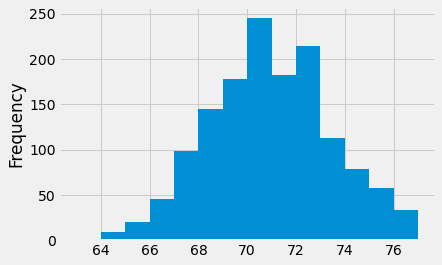

In [15]:
individuals_df["heights"].plot.hist(bins=[63,64,65,66,67,68,69,70,71,72,73,74,75,76,77])

Also, we can generate some summary statistics of the data we collected.

In [16]:
individuals_df["heights"].astype(float).describe()

count    1422.000000
mean       70.456399
std         2.516210
min        63.000000
25%        69.000000
50%        70.000000
75%        72.000000
max        77.000000
Name: heights, dtype: float64

Now, to find the average height of each team, with at least five heights listed on their roster, we can apply the `groupby()` function. We see that my team, Tulane, is the shortest team, on average, out of the 96 teams with at least five heights listed on their roster.

In [17]:
average_df = pd.DataFrame(atleast5.groupby(["name", "top_5_ability_average", "top_runner", "fifth_runner"])["heights"].mean().sort_values())
pd.set_option("display.max_rows", 100)
average_df = average_df.reset_index()
average_df

,name,top_5_ability_average,top_runner,fifth_runner,heights
0,Tulane,936,884,966,68.333333
1,St. Mary's (Cal.),872,844,890,68.642857
2,Houston,913,877,951,68.666667
3,Presbyterian,1038,969,1089,68.666667
4,Houston Baptist,908,873,942,68.777778
5,Rhode Island,900,888,908,68.777778
6,Marshall,921,901,935,68.800000
7,Arkansas-Pine Bluff,969,947,986,68.833333
8,UNCW,964,947,982,69.000000
9,Sam Houston St.,890,858,915,69.153846


Now, we should create scatterplots comparing the average height to the following performance measures of each team: <ul>
    <li>Top five ability average</li>
    <li>Top runner ability</li>
    <li>Fifth best runner ability</li>
</ul>
In addition, we will compare the average heights to a series of random numbers, to see how randomly generated numbers compare to the scatterplots of the data.

[Text(0.5, 0, 'average height (inches)'), Text(0, 0.5, 'random numbers')]

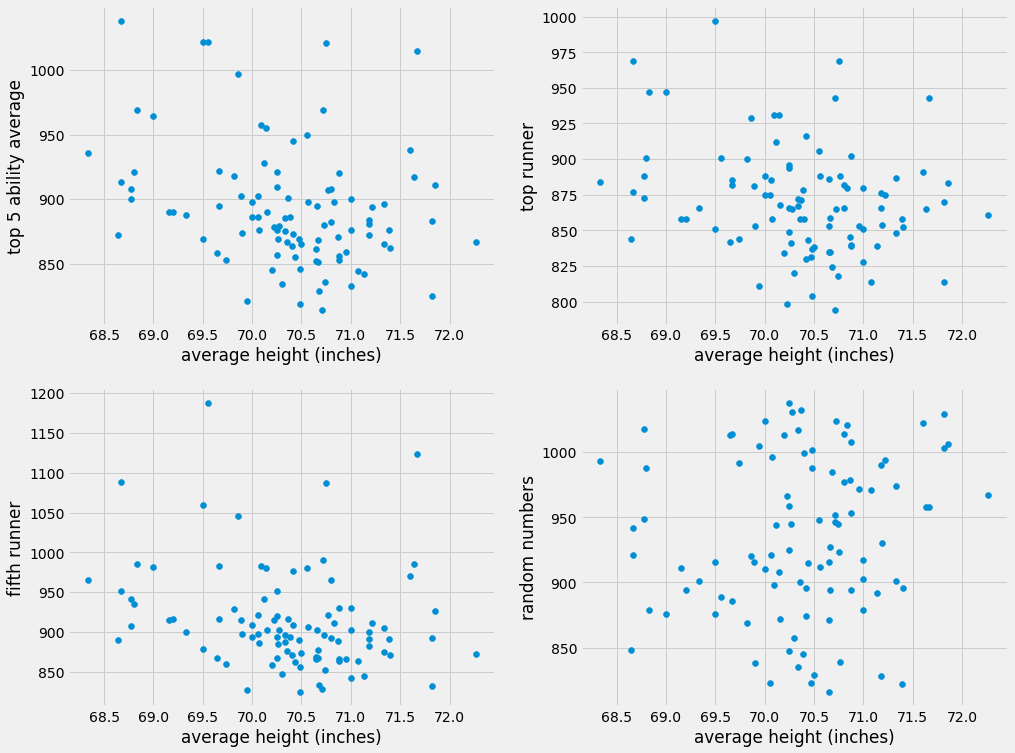

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))
axs[0, 0].scatter(average_df["heights"], average_df["top_5_ability_average"])
axs[0, 0].set(xlabel='average height (inches)', ylabel='top 5 ability average')

axs[0, 1].scatter(average_df["heights"], average_df["top_runner"])
axs[0, 1].set(xlabel='average height (inches)', ylabel='top runner')


axs[1, 0].scatter(average_df["heights"], average_df["fifth_runner"])
axs[1, 0].set(xlabel='average height (inches)', ylabel='fifth runner')

rand_nums = []
for i in range(len(average_df["heights"])):
    rand_nums.append(random.randint(min(average_df["top_5_ability_average"]), max(average_df["top_5_ability_average"])))

axs[1, 1].scatter(average_df["heights"], rand_nums)
axs[1, 1].set(xlabel='average height (inches)', ylabel='random numbers')


From this graph, we can see a slight linear negative relationship between average height and performace metrics (as a team's average height increases, the team's performance measures are faster), whereas there is no relationship between the average height and randomly generated y-coordinates.

___

<h2 align="center">4. Hypothesis Testing</h2>

Now that we have a general idea of what the data looks like, we should test whether the relationships between height and performance are statistically significant. We can do that by using the `scipy.stats` library.

In [19]:
r_value, p_value = stats.pearsonr(average_df["heights"], average_df["top_5_ability_average"])
print("The Correlation Coefficient between average height and top 5 ability average is", round(r_value, 3), "with a P-value of P =", round(p_value, 3))

r_value, p_value = stats.pearsonr(average_df["heights"], average_df["top_runner"])
print("The Correlation Coefficient between average height and the top runner's ability is", round(r_value, 3), "with a P-value of P =", round(p_value, 3))

r_value, p_value = stats.pearsonr(average_df["heights"], average_df["fifth_runner"])
print("The Correlation Coefficient between average height and the fifth best runner's ability is", round(r_value, 3), "with a P-value of P =", round(p_value, 3))

r_value, p_value = stats.pearsonr(average_df["heights"], rand_nums)
print("The Correlation Coefficient between average height and random numbers is", round(r_value, 3), "with a P-value of P =", round(p_value, 3))


The Correlation Coefficient between average height and top 5 ability average is -0.287 with a P-value of P = 0.004
The Correlation Coefficient between average height and the top runner's ability is -0.255 with a P-value of P = 0.012
The Correlation Coefficient between average height and the fifth best runner's ability is -0.251 with a P-value of P = 0.013
The Correlation Coefficient between average height and random numbers is 0.123 with a P-value of P = 0.231


Since the p-value is less than 0.05, we reject the null hypothesis that height and performane are independent variables. Since the correlation coefficients are between -0.25 and -0.3, we consider the correlations weak.

In comparison, the p-value of the random numbers generated is greater than 0.05, so we would fail to reject the null hypothesis, though this scatterplot was created to compare to the other scatterplots.

___

<h2 align="center">5. Conclusion and Further Study</h2>
In response to our initial questions:
<li>Is there a relationship between the average height of a team's runners and team success?</li>
There appears to be a weak negative correlation between average height and a team's performace, with the negative relationship representing teams with taller runners being faster on average.<br>
<li>How does my team (Tulane) compare to other D1 cross-country in terms of average height.</li>
Out of the 96 teams that provided enough data, Tulane ranks as the shortest Division I cross-country team in the country!

Since we found a weak correlation, an interesting topic for further study would be to compare each individual athlete's height to their performance, rather than the team's average height to the team's performance.

Additionally, there are a few limitations in the data we were able to collect, such as the validity of the heights, since they are typically self-reported by the athletes and usually not verified.